# Questionario: Grau e Transitividade
### Douglas Decicino de Andrade NUSP:10883512

# Rede Iesmis

## Calculo do terceiro e quarto momentos estatísticos da distribuição do grau.

In [75]:
import numpy as np
from numpy  import *
import networkx as nx
import matplotlib.pyplot as plt

In [46]:
#Carregando os dados da rede.
G= nx.read_edgelist(r"C:\Users\dougl\Desktop\Redes complexas\dados\lesmis.txt", nodetype=int, data=(('weight',float),))

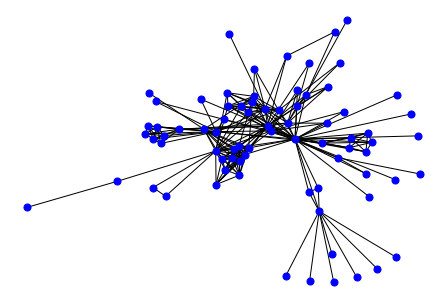

In [48]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Abaixo vamos definir uma função que calcula a distribuição de probabilidade do grau.

In [49]:
def distribuicao_grau(G):
    vk = dict(G.degree())
    vk = list(vk.values())  #Pegamos apenas os valores dos graus.
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) #Possíveis valores de k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) #A soma dos elementos de P(k) tem que ser 1
    return kvalues,Pk

Definição de uma função que calcula o m-ésimo momento da distribuição do grau.

In [50]:
def momento_distribuicao_grau(G,m):
    k,Pk = distribuicao_grau(G)
    M = sum((k**m)*Pk)
    return M

Segue abaixo o cálculo do terceiro e quarto momento da distribuição do grau da rede Iesmis

In [55]:
pk = distribuicao_grau(G) #Distribuição do grau.
k3 = momento_distribuicao_grau(G,3)
k4 = momento_distribuicao_grau(G,4)
print("Terceiro momento: ", k3, '\nQuarto momento: ',k4 )

Terceiro momento:  1408.025974025974 
Quarto momento:  33592.72727272728


# Rede Powergrid

In [58]:
#Carregando os dados da rede.
P= nx.read_edgelist(r"C:\Users\dougl\Desktop\Redes complexas\dados\powergrid.txt", nodetype=int, data=(('weight',float),))

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


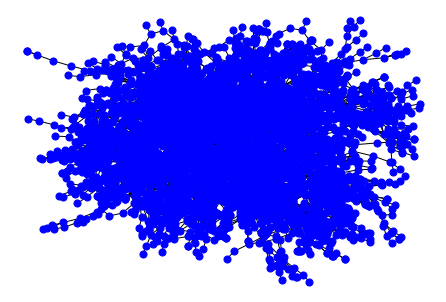

In [57]:
#Plot da rede.
pos = nx.spring_layout(P)
nx.draw(P, pos, node_color="b", node_size=50, with_labels=False)

Abaixo, vamos definir uma função para calcular o coeficiente de complexidade da rede, que é dado por:$$C_x = \frac{E[K^2]}{E[K]} $$

In [63]:
def coef_complex(G):
    C = momento_distribuicao_grau(G,2)/momento_distribuicao_grau(G,1)
    return(C)

Abaixo segue o coeficiente de complexidade da rede PowerGrid.

In [66]:
print("O coeficiente de complexidade da rede PowerGrid é: ", coef_complex(P))

O coeficiente de complexidade da rede PowerGrid é:  3.8712465878070974


# Rede EuroRoad

In [97]:
#Carregando os dados da rede.
E = nx.read_edgelist(r"C:\Users\dougl\Desktop\Redes complexas\dados\euroroad.txt", nodetype=int, data=(('weight',float),))

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


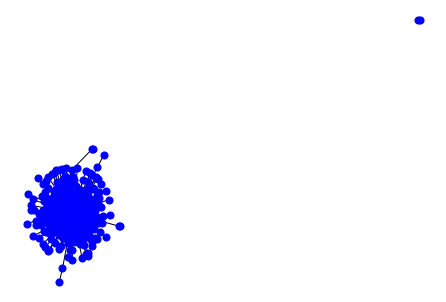

In [88]:
#Plot da rede.
pos = nx.spring_layout(E)
nx.draw(E, pos, node_color="b", node_size=50, with_labels=False)

Vamos definir uma função para calcular a entropia de Shannon.

In [92]:
def entropia_shannon(G):
    k,Pk = distribuicao_grau(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

Segue abaixo o calculo da entropia de Shannon da rede EuroRoad.

In [98]:
H = entropia_shannon(E)
print("Entropia de Shannon = ", "%3.4f"%H)

Entropia de Shannon =  2.0033


# Rede Aeroportos EUA

In [79]:
#Carregando os dados da rede.
A = nx.read_edgelist(r"C:\Users\dougl\Desktop\Redes complexas\dados\usairport.txt", nodetype=int, data=(('weight',float),))

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


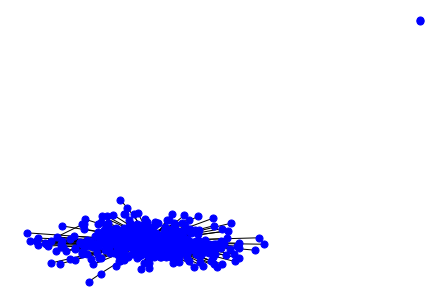

In [80]:
#Plot da rede.
pos = nx.spring_layout(A)
nx.draw(A, pos, node_color="b", node_size=50, with_labels=False)

Segue abaixo o cálculo da transitividade da transitividade média da rede de aeroportos dos EUA

In [99]:
GT = (nx.transitivity(A)) 
print("Transitividade = ","%3.4f"%GT)
avc = nx.average_clustering(A)
print("Média do grau de transitividade média:", "%3.4f"%avc)

Transitividade =  0.3841
Média do grau de transitividade média: 0.5042


Calculo do coeficiente de complexidade e entropia de Shannon para a rede de aeroportos dos EUA

In [87]:
print('Entropia de Shannon: ', entropia_shannon(A) ,'\n Coeficiente de Complexidade: ',coef_complex(A) )


Entropia de Shannon:  4.985977646539227 
 Coeficiente de Complexidade:  112.22224803950044
